<a href="https://colab.research.google.com/github/AUT-Student/CN-HW1/blob/main/ComplexNetwork_HW1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: ‌Complex Network
<br>
<b>Description:</b> HomeWork 1 | Question 2
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Graph

In [1]:
import networkx as nx
import random

class RandomGraph():
  def __init__(self, N, p):
    """ Graph generator for a random graph
    
    Args:
      N: The number of nodes.
      p: The probability of edge existence.
    """
    self.N = N
    self.p = p
    self.graph = None

  def generate_graph(self):
    self.graph = nx.Graph()
    self.graph.add_nodes_from(range(self.N))
    
    edges = []

    random.seed(0)

    for i in range(self.N):
      for j in range(i+1, self.N):
        if random.random() < self.p:
          edges.append((i, j))

    self.graph.add_edges_from(edges)

  def get_largest_component_scale(self):
    largest_component_length = len(max(nx.connected_components(self.graph), key=len))
    largest_component_scale = largest_component_length / self.N 
    return largest_component_scale

# Run

In [ ]:
# Collec Results
import math

results = []

for N in [100, 1000, 5000, 10000, 25000, 50000, 100000]:
  LnN = math.log(N)
  print(f"N = {N}, 1/N = {1/N}, ln N / N = {LnN/N}")
  for p in [0.25/N, 0.5/N, 0.75/N, 1/N, 0.75/N + 0.25*LnN/N, 0.5/N + 0.5*LnN/N, 0.25/N + 0.75*LnN/N, LnN/N, 2*LnN/N, 4*LnN/N]:
    print(f"p = {p}")
    graph = RandomGraph(N=N, p=p)
    graph.generate_graph()
    results.append({"N": N, "p": p, "LCS": graph.get_largest_component_scale()})

N = 100, 1/N = 0.01, ln N / N = 0.04605170185988092
p = 0.0025
p = 0.005
p = 0.0075
p = 0.01
p = 0.01901292546497023
p = 0.02802585092994046
p = 0.03703877639491069
p = 0.04605170185988092
p = 0.09210340371976183
p = 0.18420680743952367
N = 1000, 1/N = 0.001, ln N / N = 0.006907755278982137
p = 0.00025
p = 0.0005
p = 0.00075
p = 0.001
p = 0.002476938819745534
p = 0.003953877639491068
p = 0.0054308164592366025
p = 0.006907755278982137
p = 0.013815510557964273
p = 0.027631021115928547
N = 5000, 1/N = 0.0002, ln N / N = 0.0017034386382832477
p = 5e-05
p = 0.0001
p = 0.00015
p = 0.0002
p = 0.0005758596595708119
p = 0.0009517193191416239
p = 0.0013275789787124356
p = 0.0017034386382832477
p = 0.0034068772765664954
p = 0.006813754553132991
N = 10000, 1/N = 0.0001, ln N / N = 0.0009210340371976184
p = 2.5e-05
p = 5e-05
p = 7.5e-05
p = 0.0001
p = 0.0003052585092994046
p = 0.0005105170185988092
p = 0.0007157755278982137
p = 0.0009210340371976184
p = 0.0018420680743952368
p = 0.00368413614879047

In [ ]:
# Save results
import pandas as pd
results_pandas = pd.DataFrame(results)
results_pandas.to_csv("./Q2_Results.csv")

# Analysis

In [2]:
# Load results
import pandas as pd
results_pandas = pd.read_csv("./Q2_Results.csv", index_col=0)

In [ ]:
results_pandas

,N,p,LCS
0,100,0.002500,0.03000
1,100,0.005000,0.03000
2,100,0.007500,0.09000
3,100,0.010000,0.20000
4,100,0.019013,0.72000
...,...,...,...
65,100000,0.000063,0.99792
66,100000,0.000089,0.99990
67,100000,0.000115,0.99998
68,100000,0.000230,1.00000


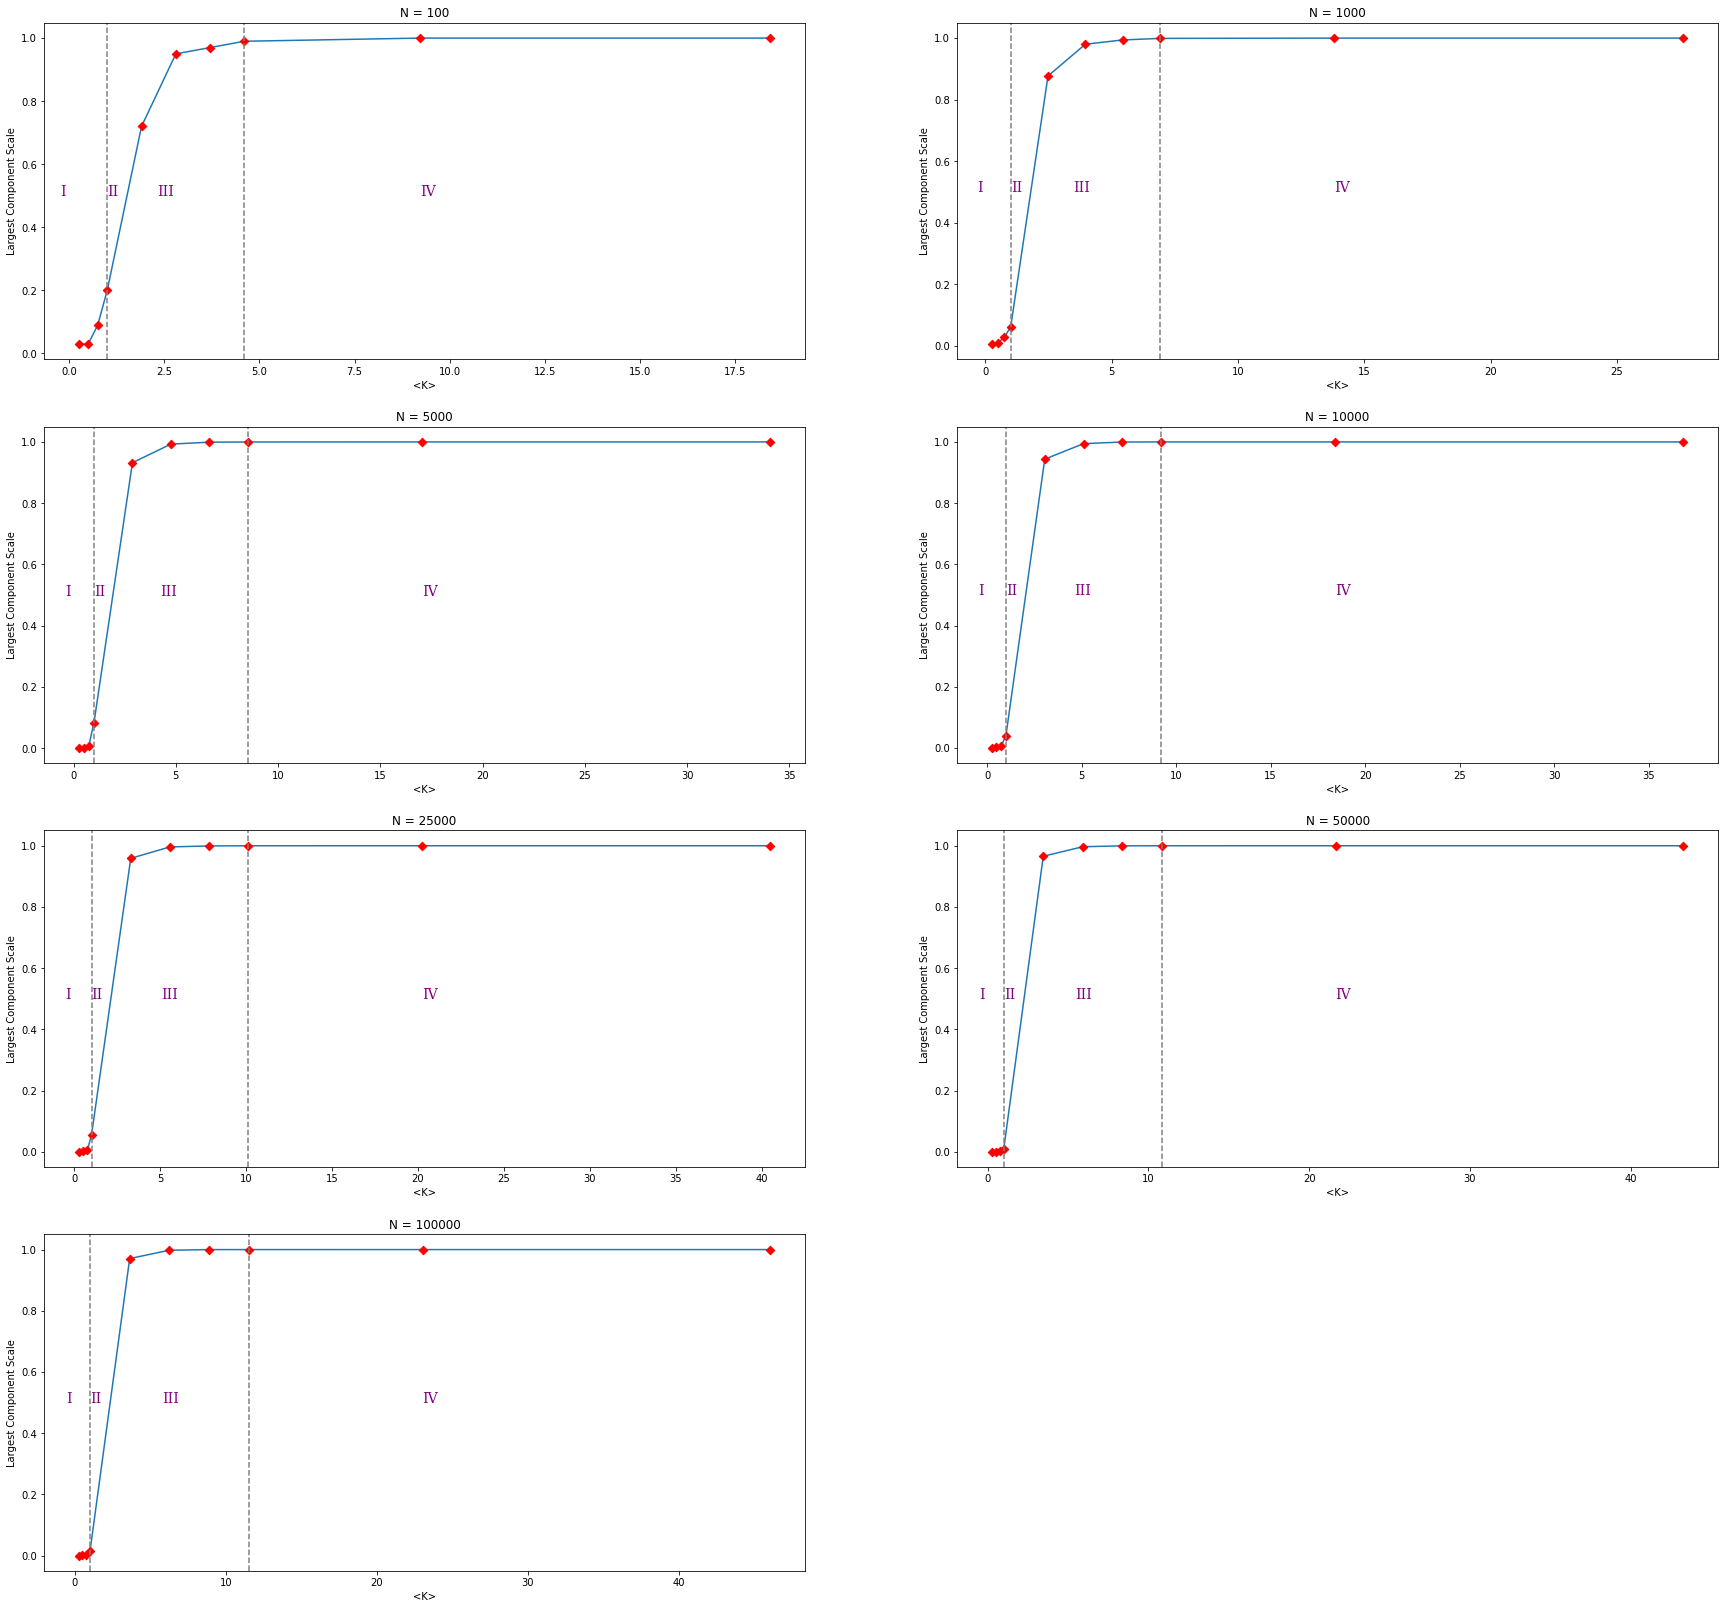

In [ ]:
# Plot results
import math
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4,2)

for i, N in enumerate([100, 1000, 5000, 10000, 25000, 50000, 100000]):
  LnN = math.log(N)

  font = {'family': 'serif',
          'color':  'purple',
          'weight': 'normal',
          'size': 14,
          }

  ax[i//2][i%2].text(-LnN/20, 0.5, "I", fontdict=font)
  ax[i//2][i%2].text(1, 0.5, "II", fontdict=font)
  ax[i//2][i%2].text(LnN/2, 0.5, "III", fontdict=font)
  ax[i//2][i%2].text(LnN*2, 0.5, "IV", fontdict=font)

  x_array = results_pandas[results_pandas["N"]==N]["p"]*N
  y_array = results_pandas[results_pandas["N"]==N]["LCS"]
  
  ax[i//2][i%2].set_title(f"N = {N}")
  ax[i//2][i%2].set_xlabel("<K>")
  ax[i//2][i%2].set_ylabel("Largest Component Scale")
  
  ax[i//2][i%2].scatter(x_array, y_array, zorder=2, color="red", marker="D")
  ax[i//2][i%2].plot(x_array, y_array, zorder=1)

  ax[i//2][i%2].axvline(x=LnN, linestyle="--", color="gray")
  ax[i//2][i%2].axvline(x=1, linestyle="--", color="gray")

plt.subplots_adjust(top=1.2)
fig.delaxes(ax[3][1])
fig.set_size_inches((30, 20))
plt.show()

In [10]:
# Caclulate Error for each N
import math
for N in [100, 1000, 5000, 10000, 25000, 50000, 100000]:
  error_sum = 0
  
  results_N = results_pandas[results_pandas["N"]==N]
  
  # Specify region for each of p
  region_id_list = [
    [0, 1, 2],
    [3],
    [4, 5, 6],
    [7, 8, 9]
  ]

  # Expected largest component scale formula
  region_LCS = [
      lambda N, p: math.log(N)/N,
      lambda N, p: N**(-1/3),
      lambda N, p: (1 - math.log(N)/N + p),
      lambda N, p: 1
  ]

  i = 0
  for _, data in results_N.iterrows():
    N = data["N"]
    p = data["p"]
    LCS = data["LCS"]
    expected_LCS  = None
    for region in range(4):
      if i in region_id_list[region]:
        expected_LCS = region_LCS[region](N, p)
        error_sum += abs(LCS - expected_LCS)

    i += 1

  print(f"N = {N}, Error = {error_sum}")

N = 100.0, Error = 0.4074176180732478
N = 1000.0, Error = 0.2042306118025446
N = 5000.0, Error = 0.10756104864003446
N = 10000.0, Error = 0.07536330324313399
N = 25000.0, Error = 0.07048781795608093
N = 50000.0, Error = 0.0562931872517284
N = 100000.0, Error = 0.04021126525439515
